# Setting up

In [3]:
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import time
import scipy as sp
import pickle
import musical
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

import matplotlib.font_manager as fm

# Path to your .ttf file
font_path = "/gpfs/data/courses/aio2025/yb2612/Arial.ttf"
font_prop = fm.FontProperties(fname=font_path)

# Register the font with matplotlib
fm.fontManager.addfont(font_path)

# Set it globally via font name
plt.rcParams['font.family'] = font_prop.get_name()

available_fonts = set(f.name for f in fm.fontManager.ttflist)
print(sorted(available_fonts))

Matplotlib created a temporary cache directory at /tmp/matplotlib-4r9xvodl because the default path (/gpfs/home/yb2612/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


['Arial', 'C059', 'Cantarell', 'D050000L', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Droid Sans', 'Droid Sans Arabic', 'Droid Sans Armenian', 'Droid Sans Devanagari', 'Droid Sans Ethiopic', 'Droid Sans Fallback', 'Droid Sans Georgian', 'Droid Sans Hebrew', 'Droid Sans Japanese', 'Droid Sans Tamil', 'Droid Sans Thai', 'Liberation Mono', 'Nimbus Mono PS', 'Nimbus Roman', 'Nimbus Sans', 'Nimbus Sans Narrow', 'P052', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'URW Bookman', 'URW Gothic', 'Z003', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


# Load X

## CESC

In [2]:
X_path = '/gpfs/data/courses/aio2025/yb2612/data/musical/cesc_X_converted.csv'
X = pd.read_csv(X_path, index_col=0)
print("mutations, samples:", X.shape)
X.head()

mutations, samples: (96, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
A[C>A]A,152,88,96,145,153,190,180,174,142,155,...,35,99,170,118,54,157,392,87,68,112
A[C>A]C,90,57,55,116,79,99,120,174,100,93,...,22,33,80,66,39,57,165,53,64,75
A[C>A]G,49,28,20,31,43,43,58,61,50,47,...,12,19,47,31,21,36,58,21,20,29
A[C>A]T,96,39,35,62,85,65,92,789,83,83,...,25,32,88,95,29,70,273,43,34,69
C[C>A]A,126,70,60,107,124,86,138,249,132,139,...,49,49,126,75,34,223,243,55,33,86


## UCEC

In [3]:
X_path = '/gpfs/data/courses/aio2025/yb2612/data/musical/ucec_X_converted.csv'
X = pd.read_csv(X_path, index_col=0)
print("mutations, samples:", X.shape)
X.head()

mutations, samples: (96, 551)


,TCGA-D1-A0ZO,TCGA-A5-A0GI,TCGA-A5-A0GX,TCGA-AX-A1C7,TCGA-EY-A1GL,TCGA-AP-A3K1,TCGA-EY-A1GC,TCGA-AX-A063,TCGA-D1-A16O,TCGA-KP-A3W4,...,TCGA-BS-A0TJ,TCGA-BG-A0MA,TCGA-EY-A1GW,TCGA-BS-A0U8,TCGA-AX-A1CI,TCGA-B5-A11M,TCGA-EO-A3KX,TCGA-BG-A18A,TCGA-PG-A914,TCGA-BS-A0UJ
A[C>A]A,170,145,191,165,245,63,154,142,61,193,...,322,115,51,38,88,177,524,62,199,169
A[C>A]C,121,88,95,98,185,40,57,70,44,124,...,148,60,40,39,82,126,363,40,138,87
A[C>A]G,59,27,50,53,58,21,32,33,28,43,...,52,27,20,6,29,28,179,24,78,40
A[C>A]T,102,80,120,96,107,36,62,69,30,126,...,121,32,42,23,67,101,349,41,118,72
C[C>A]A,113,86,771,143,177,77,180,103,44,134,...,115,83,40,12,114,168,635,75,135,105


## OV

In [4]:
X_path = '/gpfs/data/courses/aio2025/yb2612/data/musical/ov_X_converted.csv'
X = pd.read_csv(X_path, index_col=0)
print("mutations, samples:", X.shape)
X.head()

mutations, samples: (96, 486)


,TCGA-42-2593,TCGA-29-1781,TCGA-61-1903,TCGA-20-1687,TCGA-29-1699,TCGA-36-2534,TCGA-13-1411,TCGA-09-2044,TCGA-30-1714,TCGA-24-1603,...,TCGA-13-0760.1,TCGA-13-1496,TCGA-36-2545,TCGA-24-1564,TCGA-24-2261,TCGA-20-0996.1,TCGA-23-2077,TCGA-13-0889,TCGA-13-1482,TCGA-10-0926
A[C>A]A,262,84,399,134,139,177,366,83,99,148,...,80,108,110,61,249,203,96,73,83,150
A[C>A]C,238,34,340,64,68,130,175,42,81,109,...,44,68,72,69,132,103,112,62,46,46
A[C>A]G,69,16,188,27,46,50,61,22,22,39,...,22,28,49,19,70,48,25,34,22,43
A[C>A]T,141,31,282,55,72,101,162,28,39,95,...,48,69,74,37,127,80,45,44,44,77
C[C>A]A,179,58,413,64,129,133,225,57,67,117,...,84,80,114,75,158,131,65,70,55,92


## BRCA

In [5]:
X_path = '/gpfs/data/courses/aio2025/yb2612/data/musical/brca_X_converted.csv'
X = pd.read_csv(X_path, index_col=0)
print("mutations, samples:", X.shape)
X.head()

mutations, samples: (96, 1072)


,TCGA-A2-A25D,TCGA-BH-A201,TCGA-EW-A1OV,TCGA-AC-A8OQ,TCGA-A2-A0T4,TCGA-D8-A1JU,TCGA-AR-A2LO,TCGA-A2-A0YL,TCGA-C8-A1HE,TCGA-B6-A1KF,...,TCGA-C8-A12W,TCGA-A7-A26J.1,TCGA-BH-A18V,TCGA-BH-A18V.1,TCGA-A7-A13G.1,TCGA-AN-A0FS,TCGA-A7-A26J.2,TCGA-E2-A1IU,TCGA-BH-A42T,TCGA-A2-A04W
A[C>A]A,129,53,129,134,72,86,100,181,73,154,...,131,92,66,193,98,86,399,137,69,151
A[C>A]C,129,42,60,69,39,76,141,114,47,72,...,65,51,45,107,56,36,293,148,51,71
A[C>A]G,25,18,25,29,24,42,8,22,35,21,...,47,29,24,73,39,15,110,20,29,44
A[C>A]T,67,34,49,90,39,55,48,109,44,48,...,82,47,40,114,45,43,229,63,50,71
C[C>A]A,100,52,131,87,69,43,84,194,68,73,...,136,51,63,666,101,66,244,77,48,87


# De novo signature discovery

Run `run_denovo_musical.py` on a cluster with the following settings:

```python
model = musical.DenovoSig(X, 
                          min_n_components=1, # Minimum number of signatures to test
                          max_n_components=20, # Maximum number of signatures to test
                          init='random', # Initialization method
                          method='mvnmf', # mvnmf or nmf
                          n_replicates=20, # Number of mvnmf/nmf replicates to run per n_components
                          ncpu=20, # Number of CPUs to use
                          min_iter=1000,  # jin
                          max_iter=10000,  # jin
                          conv_test_freq=100,  # jin
                          mvnmf_lambda_tilde_grid=np.array([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]),  # jin
                          bootstrap=True, # Whether or not to bootstrap X for each run
                          tol=1e-5, # Tolerance for claiming convergence of mvnmf/nmf
                          verbose=1, # Verbosity of output
                          normalize_X=False # Whether or not to L1 normalize each sample in X before mvnmf/nmf
                         )
model.fit()
```

## CESC

18


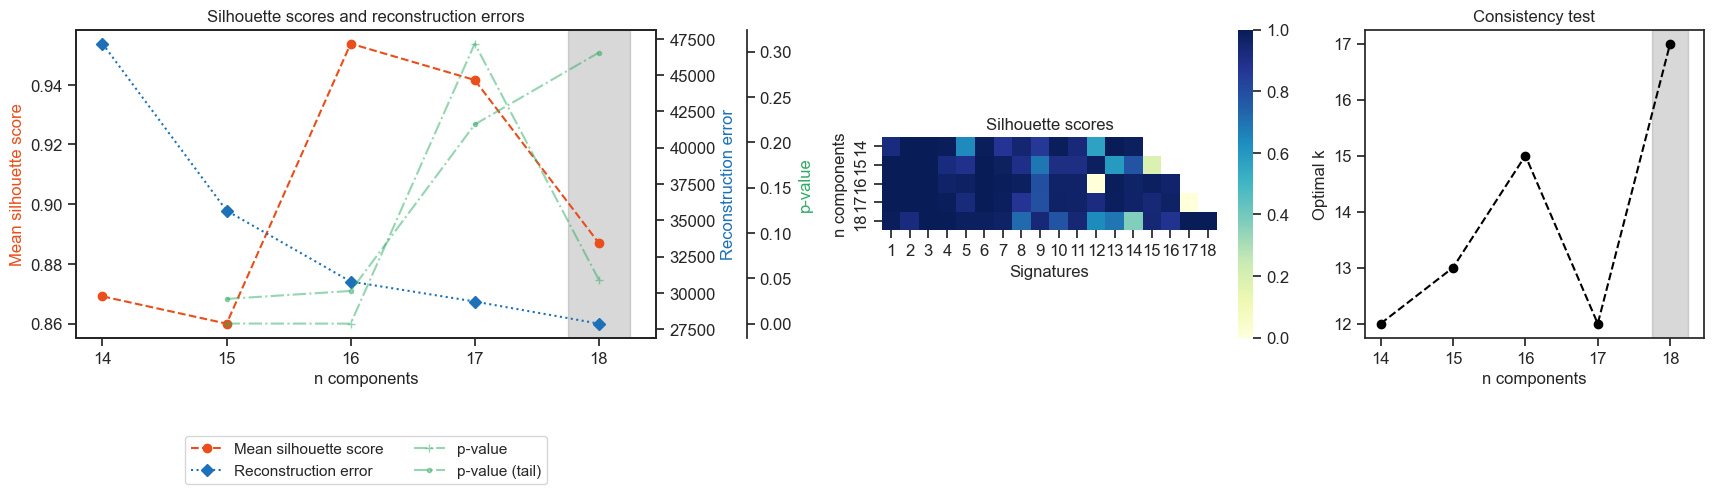

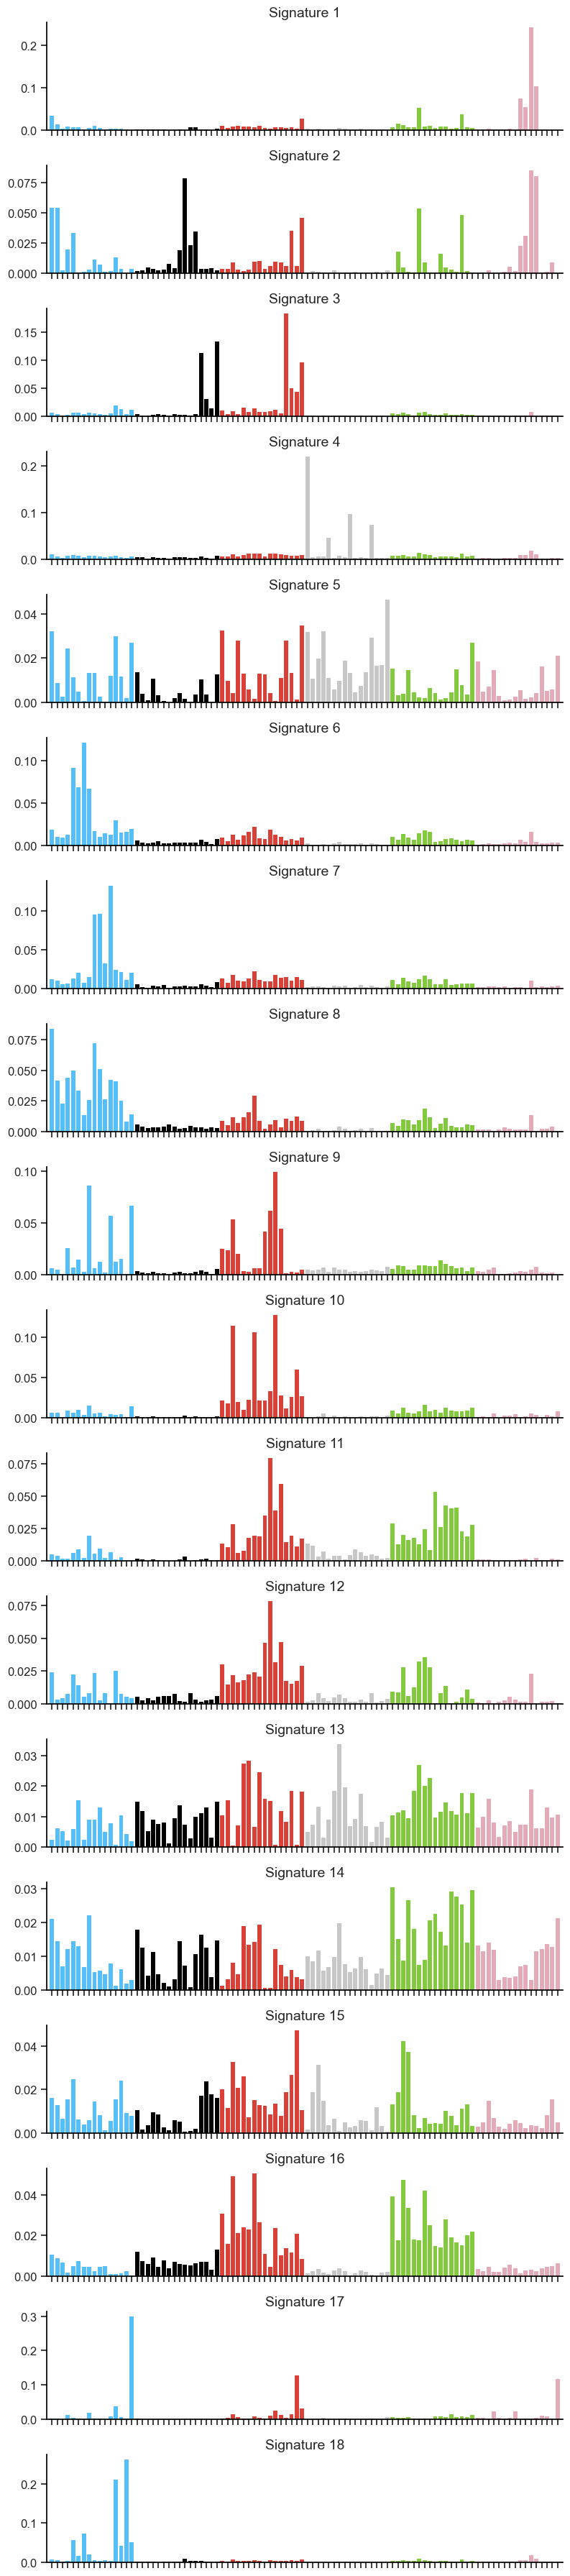

In [7]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/cesc_musical_mvnmf.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Number of discovered de novo signatures
print(model.n_components)
model.plot_selection()
fig = musical.sigplot_bar(model.W)

## UCEC

19


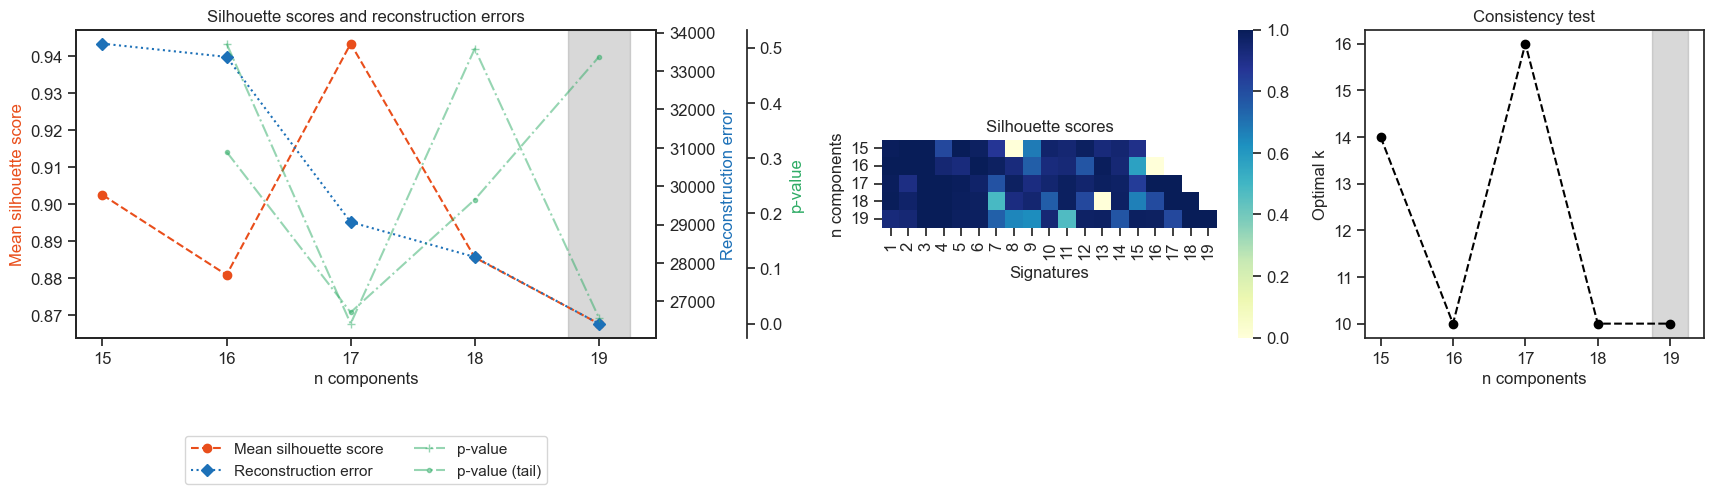

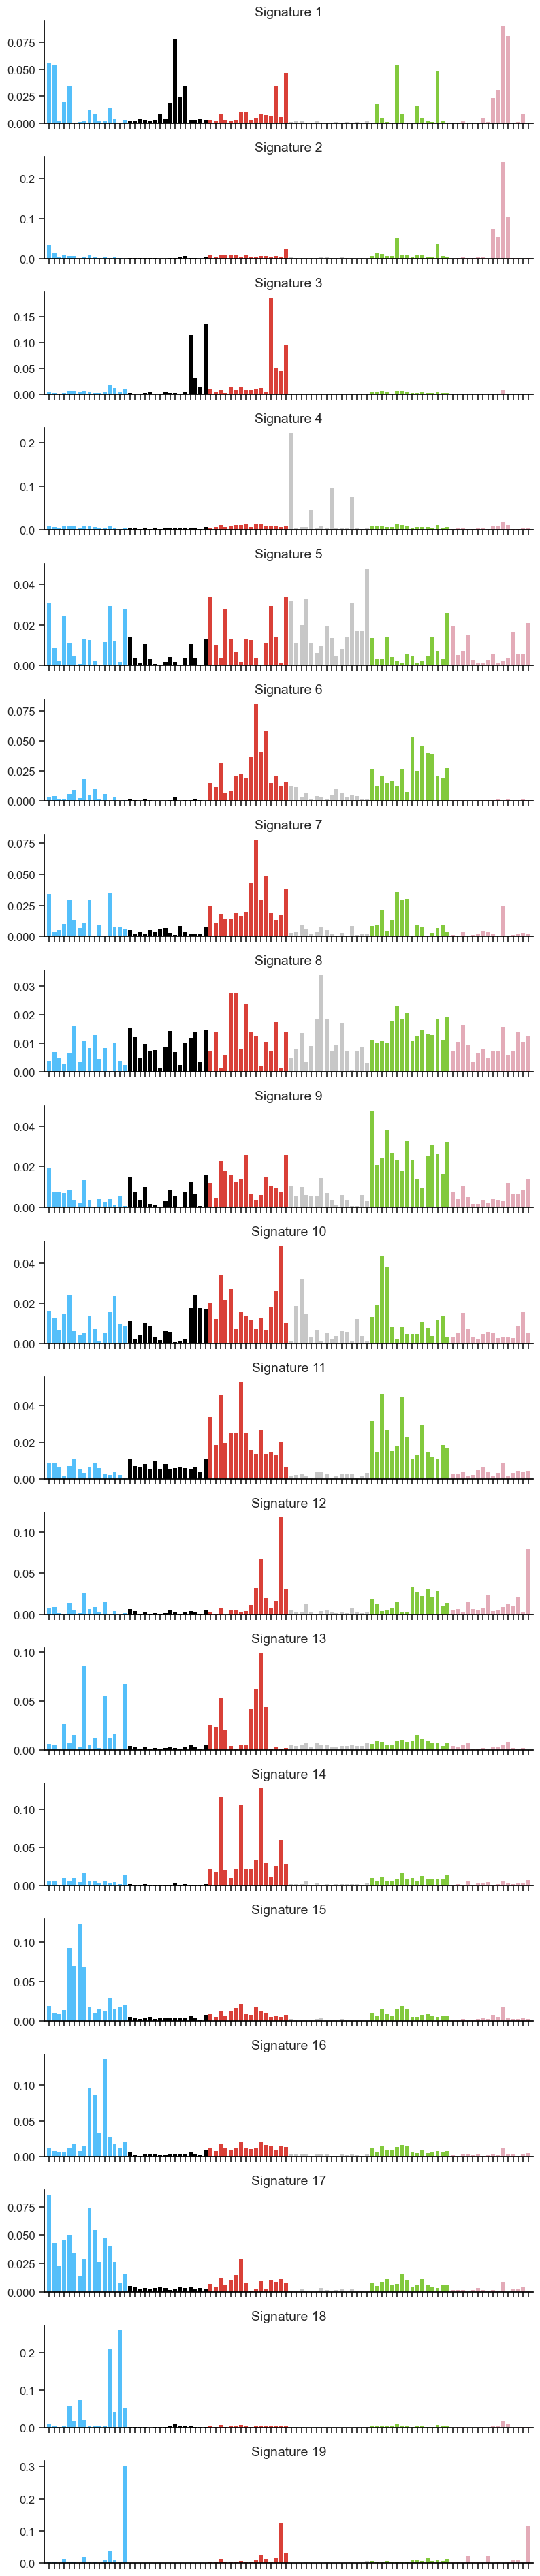

In [8]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/ucec_musical_mvnmf.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Number of discovered de novo signatures
print(model.n_components)
model.plot_selection()
fig = musical.sigplot_bar(model.W)

## OV

22


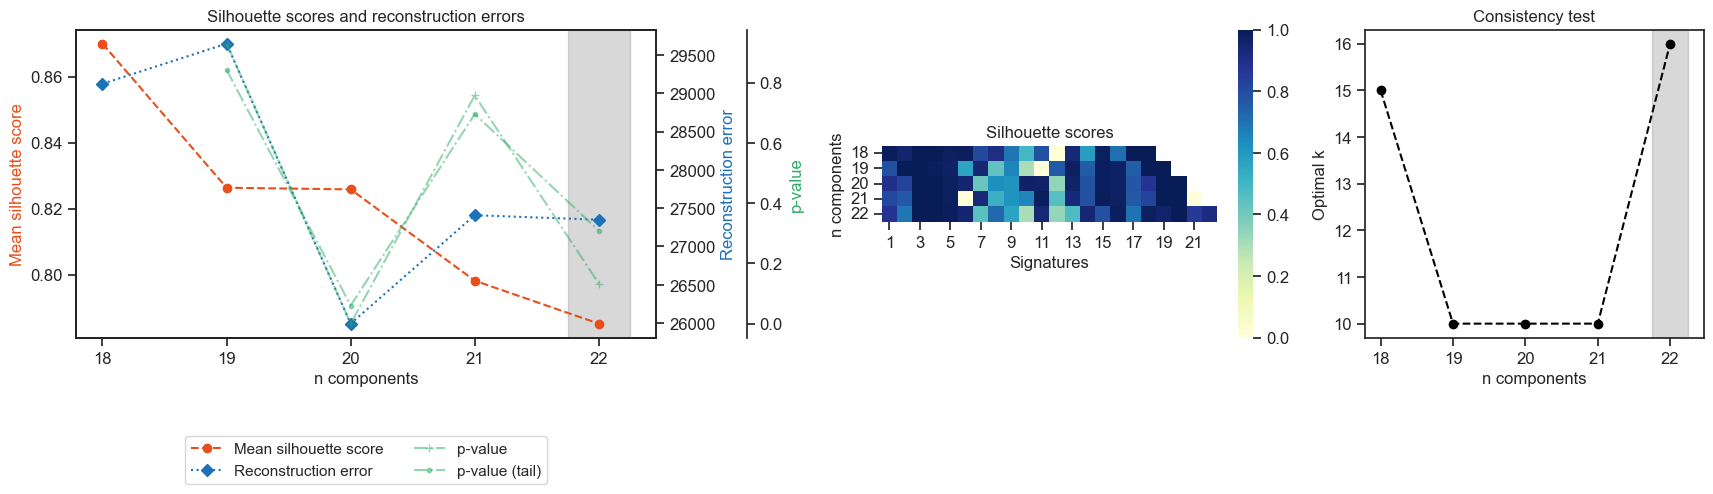

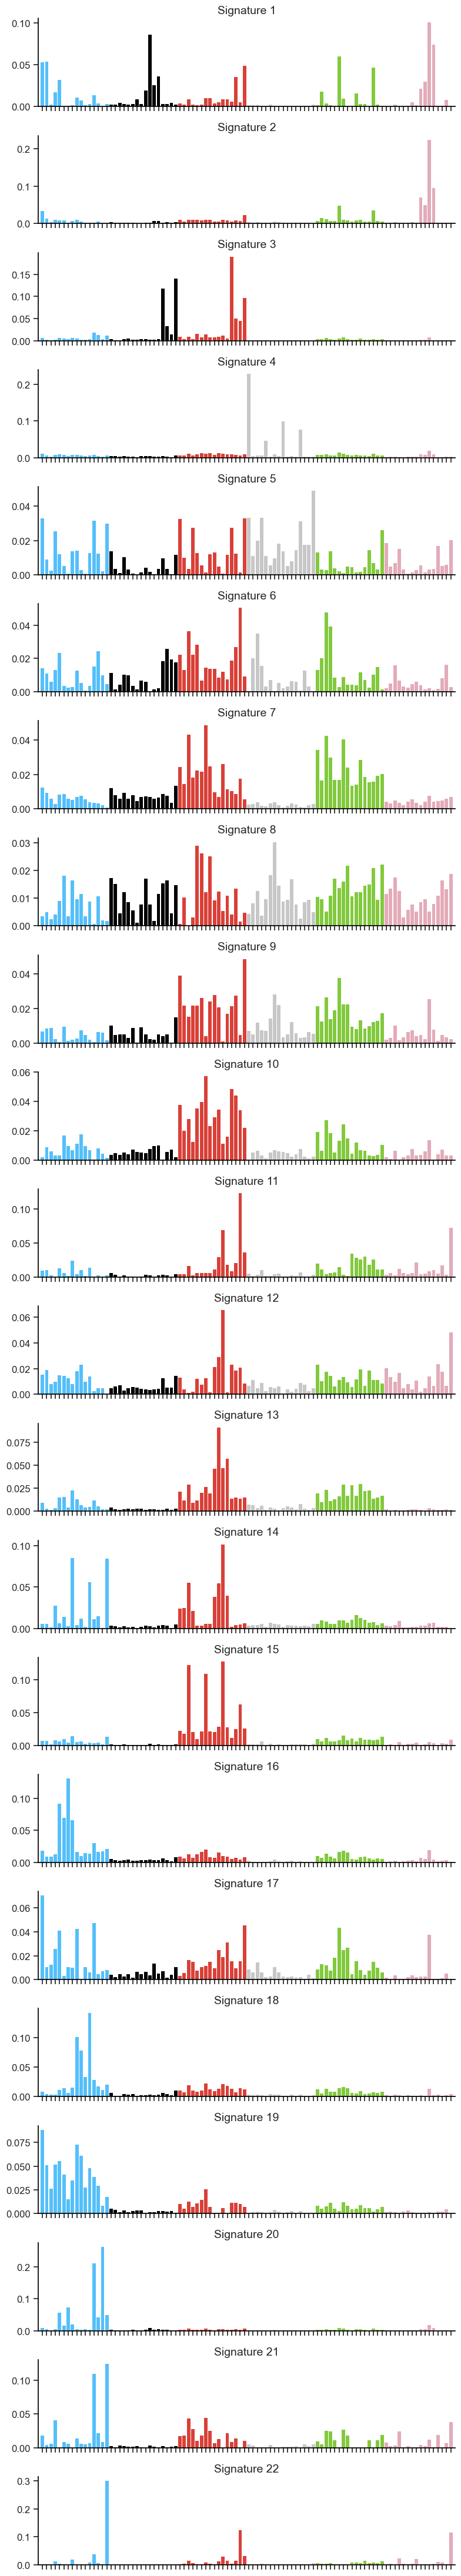

In [10]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/ov_musical_mvnmf.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Number of discovered de novo signatures
print(model.n_components)
model.plot_selection()
fig = musical.sigplot_bar(model.W)

## BRCA

21


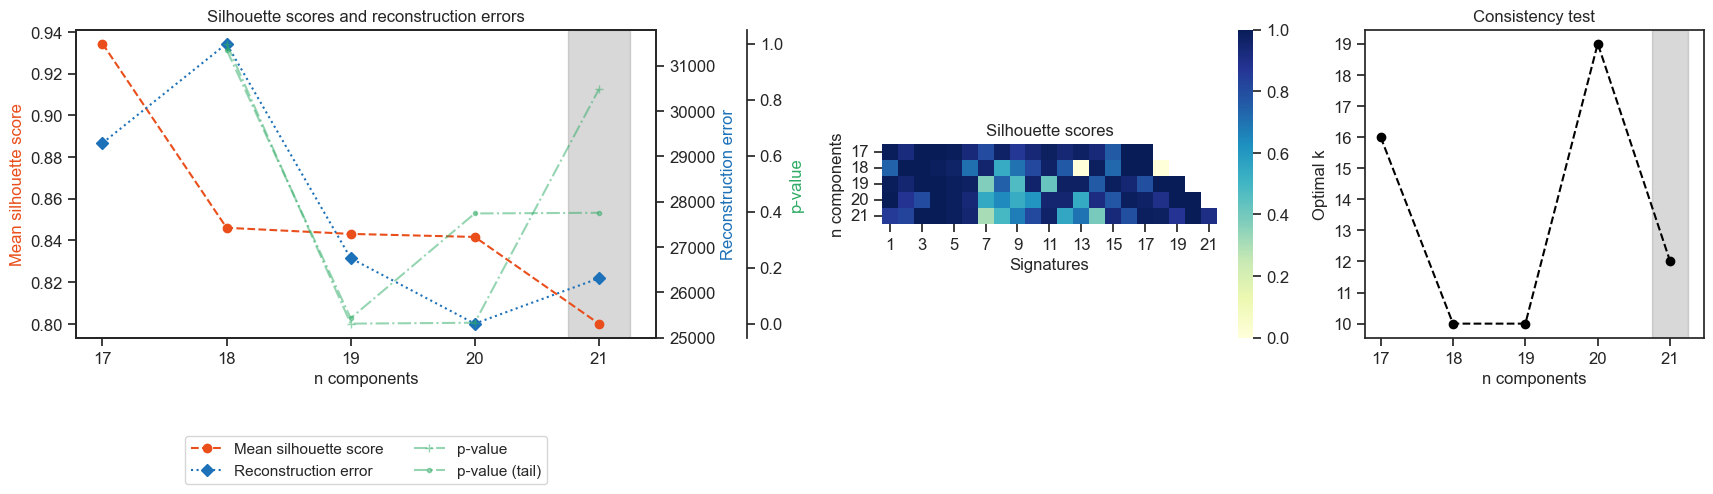

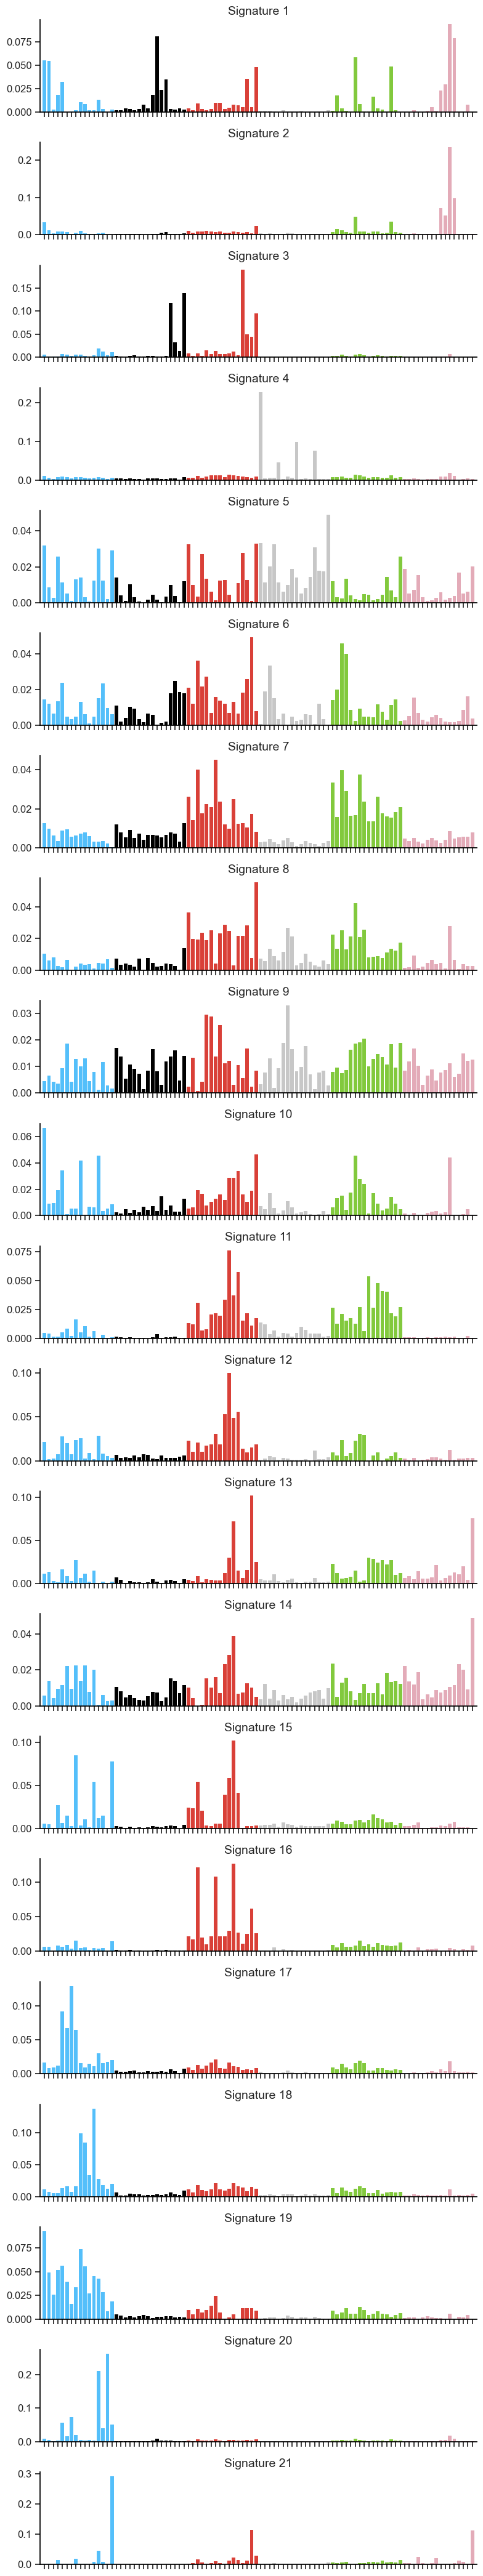

In [9]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/brca_musical_mvnmf.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Number of discovered de novo signatures
print(model.n_components)
model.plot_selection()
fig = musical.sigplot_bar(model.W)

# Signature assignment with 2D threshold grid search

Following de novo signature discovery, we match de novo signatures to the catalog and refit the data against matched signatures to obtain exposures. Matching and refitting are jointly called "signature assignment".

For the purpose of downstream parameter optimization with data-driven simulations, here we perform matching and refitting on a 2-dimensional grid of parameters. The two parameters correspond to the two likelihood thresholds for likelihood-based sparse NNLS used in matching and refitting, respectively.

The following grid will be used for both matching and refitting thresholds:

In [20]:
thresh_grid = np.array([
    0.0001, 0.0002, 0.0005,
    0.001, 0.002, 0.005,
    0.01, 0.02, 0.05,
    0.1, 0.2, 0.5,
    1., 2., 5.
])

We then load the signature catalog to be used.

For better performance, you can restrict to signatures known to be present in the corresponding tumor type (in this case, Skin.Melanoma), and remove mismatch repair deficiency (MMRD)- and/or polymerase proofreading deficiency (PPD)- related signatures (since in this case, we know that our dataset does not contain MMRD/PPD samples). See example_refitting.ipynb for more details.

## Choosing/restricting catalog

In [21]:
catalog = musical.load_catalog('COSMIC-MuSiCal_v3p2_SBS_WGS')
W_catalog = catalog.W
print(W_catalog.shape[1])
W_catalog

84


,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS91,SBS92,SBS93,SBS94,SBS95,SBS96,SBS98,SBS97,SBS99,SBS100
Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,8.861572e-04,5.800168e-07,0.020808,0.042196,0.011998,0.000425,6.704351e-05,0.002329,0.004830,0.000040,...,0.002945,0.011329,0.011573,0.015580,0.014191,0.002303,0.013372,3.393376e-04,0.010959,0.004213
A[C>A]C,2.280405e-03,1.480043e-04,0.016507,0.033297,0.009438,0.000524,1.791162e-04,0.000461,0.001150,0.000765,...,0.052997,0.009745,0.008096,0.024746,0.004125,0.000252,0.010144,4.083738e-03,0.008626,0.020254
A[C>A]G,1.770314e-04,5.230151e-05,0.001751,0.015599,0.001850,0.000052,7.124623e-05,0.000186,0.000377,0.000250,...,0.000204,0.004697,0.001761,0.001574,0.001476,0.000000,0.002156,4.285896e-04,0.000852,0.023699
A[C>A]T,1.280227e-03,9.780282e-05,0.012205,0.029498,0.006609,0.000180,2.481610e-04,0.000710,0.001960,0.004049,...,0.000131,0.007758,0.008421,0.011076,0.001789,0.000000,0.012239,1.545020e-03,0.022806,0.039299
C[C>A]A,3.120554e-04,2.080060e-04,0.022509,0.080693,0.007429,0.001821,4.552955e-04,0.001140,0.000109,0.014498,...,0.008191,0.018550,0.006498,0.079926,0.002319,0.000000,0.007782,3.545584e-03,0.014845,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G[T>G]T,1.460259e-05,2.230064e-16,0.005832,0.000252,0.002350,0.000787,8.355422e-04,0.001830,0.006751,0.006839,...,0.000054,0.000200,0.006148,0.002121,0.003204,0.004054,0.004398,1.199683e-07,0.012050,0.017845
T[T>G]A,2.230396e-16,1.670048e-05,0.007253,0.000377,0.005219,0.000105,1.280831e-04,0.000955,0.019302,0.000211,...,0.005955,0.002208,0.053674,0.004072,0.001073,0.003347,0.008400,2.296746e-04,0.069147,0.004601
T[T>G]C,5.510978e-05,7.040203e-05,0.006283,0.000174,0.006559,0.000287,1.160753e-04,0.001550,0.017401,0.000115,...,0.000143,0.000301,0.013276,0.001235,0.002069,0.001813,0.005467,3.090285e-04,0.015748,0.000000


Choosing catalog and tumor type:
* Breast invasive carcinoma (BRCA) - 'Breast.AdenoCA', 'Breast.DCIS', 'Breast.LobularCA'
* Cervical squamous cell carcinoma and endocervical adenocarcinoma (CESC) - 'Cervix.AdenoCA', 'Cervix.SCC'
* Ovarian serous cystadenocarcinoma (OV) - 'Ovary.AdenoCA'
* Uterine corpus endometrial carcinoma (UCEC) - 'Uterus.AdenoCA'

In [31]:
print("Catalogs:", musical.catalog.CATALOG_NAMES)

# choose catalog
W_catalog = musical.load_catalog('COSMIC-MuSiCal_v3p2_SBS_WGS')
print("\nSignatures in catalog:", W_catalog.W.shape[1])

print("\nTumor types in chosen catalog:", catalog.show_tumor_type_options().tolist())

# choose restrict
W_catalog.restrict_catalog(tumor_type='Breast.LobularCA')
print("\nSignatures after restriction:", W_catalog.W.shape[1])

Catalogs: ['COSMIC_v2_SBS_WGS', 'COSMIC_v3_SBS_WGS', 'COSMIC_v3_SBS_WES', 'COSMIC_v3p1_SBS_WGS', 'COSMIC_v3p2_SBS_WGS', 'COSMIC-MuSiCal_v3p2_SBS_WGS', 'COSMIC_v3p1_Indel', 'MuSiCal_v4_Indel_WGS']

Signatures in catalog: 84

Tumor types in chosen catalog: ['Biliary.AdenoCA', 'Bladder.TCC', 'Bone.Benign', 'Bone.Epith', 'Bone.Osteosarc', 'Breast.AdenoCA', 'Breast.DCIS', 'Breast.LobularCA', 'CNS.GBM', 'CNS.Medullo', 'CNS.Oligo', 'CNS.PiloAstro', 'Cervix.AdenoCA', 'Cervix.SCC', 'ColoRect.AdenoCA', 'Eso.AdenoCA', 'Head.SCC', 'Kidney.ChRCC', 'Kidney.RCC', 'Liver.HCC', 'Lung.AdenoCA', 'Lung.SCC', 'Lymph.BNHL', 'Lymph.CLL', 'Myeloid.AML', 'Myeloid.MDS', 'Myeloid.MPN', 'Ovary.AdenoCA', 'Panc.AdenoCA', 'Panc.Endocrine', 'Prost.AdenoCA', 'Skin.Melanoma', 'SoftTissue.Leiomyo', 'SoftTissue.Liposarc', 'Stomach.AdenoCA', 'Thy.AdenoCA', 'Uterus.AdenoCA']

Signatures after restriction: 23


## Run assign_grid

Run `assign_grid_musical.py` on a cluster with the following settings:

```python
model.assign_grid(W_catalog, 
                  method_assign='likelihood_bidirectional', # Method for performing matching and refitting
                  thresh_match_grid=thresh_grid, # Grid of threshold for matchinng
                  thresh_refit_grid=thresh_grid, # Grid of threshold for refitting
                  thresh_new_sig=0.0, # De novo signatures with reconstructed cosine similarity below this threshold will be considered novel
                  connected_sigs=False, # Whether or not to force connected signatures to co-occur
                  clean_W_s=False # An optional intermediate step to avoid overfitting to small backgrounds in de novo signatures for 96-channel SBS signatures
                 )
```

The signatures and exposures after assignment are called `W_s` and `H_s`, respectively, where s stands for sparse.
* `W`: Signature matrix (features x signatures)
* `H`: Exposure matrix (signatures x samples)

# Check model results

Here, the key of the dictionary W_s_grid and H_s_grid is (thresh_match, thresh_refit).

The number of assigned signatures varies largely by threshold. Therefore, it is important to choose the appropriate thresholds for matching and refitting.

## CESC

In [82]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/cesc_musical_mvnmf_Cervix.SCC_assign_grid.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Result with small thresholds:")
print(model.W_s_grid[(0.0001, 0.0001)].shape)
print(model.H_s_grid[(0.0001, 0.0001)].shape)

print("\nResult with large thresholds:")
print(model.W_s_grid[(1.0, 1.0)].shape)
print(model.H_s_grid[(1.0, 1.0)].shape)

# let's save the smallest threshold
results_dir = "/gpfs/data/courses/aio2025/yb2612/results/musical_matrices"
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/cesc_musical_mvnmf_Cervix.SCC_W_s_0.0001_0.0001.csv", index=True)
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/cesc_musical_mvnmf_Cervix.SCC_H_s_0.0001_0.0001.csv", index=True)

model.H_s_grid[(0.0001, 0.0001)]

Result with small thresholds:
(96, 16)
(16, 307)

Result with large thresholds:
(96, 5)
(5, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
SBS1,440.984537,635.837259,205.738077,0.000000,476.420043,350.238255,1865.823052,1706.916219,695.363518,858.981466,...,92.232286,207.617553,203.549462,147.768934,167.390776,117.079537,0.000000,281.651368,169.782903,195.957303
SBS2,0.000000,0.000000,54.760165,0.000000,0.000000,0.000000,726.274055,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,58.605514,0.000000,0.000000,0.000000,0.000000
SBS5,5260.868613,4166.903823,1441.997236,2137.890348,2603.162061,3742.640348,10685.671788,1579.607575,5463.084635,7521.083876,...,1403.263621,2040.486010,1783.930771,3352.761081,2405.047491,1754.934685,5413.542675,2773.016936,1620.601249,1964.918799
SBS10a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24190.622455,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14238.914315,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS13,96.587572,63.529333,74.814539,0.000000,0.000000,0.000000,502.756828,0.000000,137.010318,123.690948,...,0.000000,0.000000,17.120476,0.000000,0.000000,48.158186,254.421453,0.000000,0.000000,38.039221
SBS14,21.158931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1489.158584,0.000000,0.000000,...,18.721782,0.000000,0.000000,103.272873,0.000000,0.000000,368.013348,0.000000,10.407819,0.000000
SBS15,0.000000,0.000000,0.000000,0.000000,212.471217,0.000000,0.000000,990.010979,0.000000,0.000000,...,89.045286,0.000000,0.000000,0.000000,0.000000,294.402443,0.000000,0.000000,0.000000,0.000000
SBS18,579.412460,161.243775,559.751037,638.271364,913.061204,642.493838,302.880386,650.322234,558.473776,416.314938,...,225.949503,361.005249,1129.130213,486.125864,117.276494,1270.349014,2011.319923,268.281000,295.010003,823.395504
SBS20,0.000000,117.194397,98.855017,0.000000,404.666594,0.000000,170.970051,294.794155,190.428145,156.495884,...,0.000000,0.000000,196.060983,0.000000,121.391643,600.831780,0.000000,186.030577,0.000000,132.630655


In [83]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/cesc_musical_mvnmf_Cervix.AdenoCA_assign_grid.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Result with small thresholds:")
print(model.W_s_grid[(0.0001, 0.0001)].shape)
print(model.H_s_grid[(0.0001, 0.0001)].shape)

print("\nResult with large thresholds:")
print(model.W_s_grid[(1.0, 1.0)].shape)
print(model.H_s_grid[(1.0, 1.0)].shape)

# let's save the smallest threshold
results_dir = "/gpfs/data/courses/aio2025/yb2612/results/musical_matrices"
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/cesc_musical_mvnmf_Cervix.AdenoCA_W_s_0.0001_0.0001.csv", index=True)
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/cesc_musical_mvnmf_Cervix.AdenoCA_H_s_0.0001_0.0001.csv", index=True)

model.H_s_grid[(0.0001, 0.0001)]

Result with small thresholds:
(96, 16)
(16, 307)

Result with large thresholds:
(96, 5)
(5, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
SBS1,452.940557,639.349180,214.747246,0.000000,477.558782,366.999552,1871.980254,1706.623477,706.813979,870.554671,...,91.534694,212.19174,228.828752,156.998771,170.008929,126.939945,0.000000,287.689634,174.805031,215.294982
SBS2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,722.912610,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS5,5472.495019,4249.687395,1871.101404,2453.383200,2996.535526,4127.818430,10870.460087,1886.234446,5775.210102,7689.984493,...,1474.449527,2367.03838,2352.056388,3571.169027,2456.320410,2270.770571,6129.399068,3050.071417,1763.387426,2363.496986
SBS10a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24277.859736,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14233.560569,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10d,36.513722,0.000000,59.527116,0.000000,134.085561,0.000000,0.000000,0.000000,0.000000,98.884373,...,0.000000,0.00000,123.033488,71.510274,0.000000,286.912811,392.816038,0.000000,5.814334,99.806840
SBS13,112.204665,69.146158,81.026958,0.000000,21.621373,0.000000,512.793502,0.000000,153.762051,127.500354,...,0.000000,0.00000,0.000000,0.000000,0.000000,60.481711,278.834788,0.000000,0.000000,51.779544
SBS14,190.494373,0.000000,102.285058,126.607956,179.203603,0.000000,0.000000,1638.182990,131.647252,0.000000,...,91.083040,90.98159,307.573199,227.039546,0.000000,75.748395,826.360024,0.000000,102.556130,198.107233
SBS15,0.000000,0.000000,0.000000,0.000000,269.417132,0.000000,0.000000,1028.906373,0.000000,0.000000,...,101.276524,0.00000,0.000000,0.000000,0.000000,357.017826,0.000000,0.000000,0.000000,0.000000
SBS20,0.000000,141.332696,90.075278,0.000000,375.845379,0.000000,216.047916,260.024908,164.646078,215.380030,...,0.000000,0.00000,102.901773,0.000000,138.629655,697.159848,0.000000,225.094942,0.000000,88.093699


## UCEC

In [84]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/ucec_musical_mvnmf_Uterus.AdenoCA_assign_grid.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Result with small thresholds:")
print(model.W_s_grid[(0.0001, 0.0001)].shape)
print(model.H_s_grid[(0.0001, 0.0001)].shape)

print("\nResult with large thresholds:")
print(model.W_s_grid[(1.0, 1.0)].shape)
print(model.H_s_grid[(1.0, 1.0)].shape)

# let's save the smallest threshold
results_dir = "/gpfs/data/courses/aio2025/yb2612/results/musical_matrices"
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/ucec_musical_mvnmf_Uterus.AdenoCA_W_s_0.0001_0.0001.csv", index=True)
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/ucec_musical_mvnmf_Uterus.AdenoCA_H_s_0.0001_0.0001.csv", index=True)

model.H_s_grid[(0.0001, 0.0001)]

Result with small thresholds:
(96, 22)
(22, 307)

Result with large thresholds:
(96, 7)
(7, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
SBS1,464.807434,646.799203,240.495402,192.190011,504.511103,457.734161,1873.408447,1720.966390,734.983298,924.317884,...,124.725755,248.795145,250.446278,200.678423,216.300154,160.870551,160.422779,346.847212,198.902188,200.781820
SBS2,0.000000,0.000000,74.378705,0.000000,0.000000,118.511410,732.149145,0.000000,0.000000,0.000000,...,30.606429,51.197032,0.000000,108.122220,91.170822,95.020689,279.422241,69.763996,22.633167,0.000000
SBS3,1621.999912,976.915041,1110.889373,2245.336107,1029.203059,3662.069286,1128.885248,325.336273,2149.909467,1685.306970,...,964.820407,1252.904041,1436.378162,2113.817624,1361.170050,1480.611759,4691.450920,2390.834128,847.857284,1025.959678
SBS5,3755.451585,3190.482124,484.333340,0.000000,1552.899222,0.000000,7705.885776,0.000000,3658.442168,5962.370056,...,180.695397,661.465802,645.886724,988.669546,692.081507,266.531951,1516.175557,0.000000,617.567920,948.539945
SBS8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.774073,...,0.000000,0.000000,0.000000,410.497357,0.000000,0.000000,2253.794493,0.000000,0.000000,0.000000
SBS10a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24210.279043,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10b,159.549053,0.000000,0.000000,57.414989,0.000000,0.000000,258.718738,14282.147551,174.968149,0.000000,...,21.721573,0.000000,0.000000,68.704676,0.000000,0.000000,0.000000,54.851484,0.000000,40.071650
SBS13,38.219285,30.856883,35.451400,0.000000,0.000000,0.000000,501.777648,0.000000,54.899321,60.517907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.110454,0.000000,0.000000,4.878757
SBS14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1446.369771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS15,0.000000,75.313285,0.000000,0.000000,232.053594,73.204352,0.000000,1139.729541,0.000000,0.000000,...,105.729985,0.000000,0.000000,0.000000,0.000000,295.491396,0.000000,0.000000,0.000000,64.631518


## OV

In [85]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/ov_musical_mvnmf_Ovary.AdenoCA_assign_grid.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Result with small thresholds:")
print(model.W_s_grid[(0.0001, 0.0001)].shape)
print(model.H_s_grid[(0.0001, 0.0001)].shape)

print("\nResult with large thresholds:")
print(model.W_s_grid[(1.0, 1.0)].shape)
print(model.H_s_grid[(1.0, 1.0)].shape)

# let's save the smallest threshold
results_dir = "/gpfs/data/courses/aio2025/yb2612/results/musical_matrices"
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/ov_musical_mvnmf_Ovary.AdenoCA_W_s_0.0001_0.0001.csv", index=True)
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/ov_musical_mvnmf_Ovary.AdenoCA_H_s_0.0001_0.0001.csv", index=True)

model.H_s_grid[(0.0001, 0.0001)]

Result with small thresholds:
(96, 22)
(22, 307)

Result with large thresholds:
(96, 7)
(7, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
SBS1,461.710335,645.028344,241.977653,191.819232,501.659971,468.468389,1861.701674,1723.211923,733.866095,919.447826,...,130.004981,249.629120,246.639214,195.933243,216.108829,152.870536,166.609310,351.796067,198.252617,227.361535
SBS2,52.751105,0.000000,79.466026,78.052676,0.000000,141.920283,719.462955,0.000000,89.903315,0.000000,...,37.074296,57.991977,0.000000,112.969495,93.103745,93.996446,343.932820,89.966560,24.647899,0.000000
SBS3,1687.770396,1213.069207,1002.798591,2555.625112,895.869717,3681.362177,0.000000,917.866363,1987.249191,1790.035613,...,912.496134,1277.628832,1277.129606,2053.316254,1360.666546,1453.164575,5254.802307,2410.823557,809.397570,705.701501
SBS5,3969.495220,3471.043075,635.093082,0.000000,1876.479378,545.949706,10840.873392,0.000000,3694.406720,6372.897697,...,465.121790,916.341975,838.972255,1576.570717,1318.201206,594.972138,1877.256363,286.620942,889.479870,1367.250586
SBS8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,297.100387,412.334678,...,0.000000,0.000000,0.000000,440.653790,0.000000,0.000000,2399.072251,0.000000,0.000000,0.000000
SBS10a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24213.988603,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10b,149.428363,0.000000,0.000000,60.226663,0.000000,0.000000,0.000000,14307.832833,171.548461,0.000000,...,0.000000,0.000000,0.000000,59.132917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.492436,0.000000,0.000000,0.000000
SBS13,41.639048,18.959992,36.737291,0.000000,0.000000,0.000000,497.964470,0.000000,79.065613,58.632638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.176063,0.000000,0.000000,4.019264
SBS14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1412.276296,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.090680,0.000000,0.000000,0.000000


## BRCA

In [86]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/brca_musical_mvnmf_Breast.AdenoCA_assign_grid.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Result with small thresholds:")
print(model.W_s_grid[(0.0001, 0.0001)].shape)
print(model.H_s_grid[(0.0001, 0.0001)].shape)

print("\nResult with large thresholds:")
print(model.W_s_grid[(1.0, 1.0)].shape)
print(model.H_s_grid[(1.0, 1.0)].shape)

model.W_s_grid[(0.0001, 0.0001)]

# let's save the smallest threshold
results_dir = "/gpfs/data/courses/aio2025/yb2612/results/musical_matrices"
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/brca_musical_mvnmf_Breast.AdenoCA_W_s_0.0001_0.0001.csv", index=True)
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/brca_musical_mvnmf_Breast.AdenoCA_H_s_0.0001_0.0001.csv", index=True)

model.H_s_grid[(0.0001, 0.0001)]

Result with small thresholds:
(96, 23)
(23, 307)

Result with large thresholds:
(96, 7)
(7, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
SBS1,430.342906,623.786694,232.060125,169.925954,487.470647,390.605709,1875.010102,1707.773854,723.436891,908.103612,...,114.451673,227.219754,242.370542,189.907554,198.650927,108.194711,149.156324,317.013025,190.435769,193.098218
SBS2,0.000000,0.000000,75.505091,73.034993,0.000000,122.385480,737.866626,0.000000,85.594778,0.000000,...,32.061174,52.227999,30.944345,121.221705,91.669307,66.497259,331.320325,67.725916,21.383157,0.000000
SBS3,0.000000,896.857387,878.508819,1656.608018,852.525851,2234.353941,0.000000,0.000000,1667.154375,1465.192553,...,777.549973,676.110449,1298.156840,1940.797659,1056.424471,0.000000,4903.044744,1325.681412,642.848251,1044.338367
SBS5,4586.822650,3466.768747,652.069944,91.023685,1739.187499,834.200736,10434.484092,1577.562923,3710.337464,6292.115595,...,605.431653,926.604179,570.523994,1364.309455,1223.663150,1302.301567,2015.392124,912.444825,924.060698,1066.288038
SBS8,551.515498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,243.819251,247.058307,...,0.000000,0.000000,0.000000,473.743575,0.000000,0.000000,2143.391132,0.000000,0.000000,0.000000
SBS10a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24192.420848,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10b,146.548452,0.000000,0.000000,51.145356,0.000000,0.000000,0.000000,14241.936806,168.275810,0.000000,...,0.000000,0.000000,0.000000,65.896748,0.000000,0.000000,0.000000,0.000000,0.000000,42.201669
SBS10d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.342516,0.000000,0.000000,0.000000
SBS13,118.403556,35.053099,47.750511,0.000000,0.000000,0.000000,509.927716,0.000000,95.013611,77.311674,...,0.000000,5.512415,0.000000,0.000000,16.885041,58.982086,118.806416,0.000000,0.000000,5.256818
SBS14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1489.095474,0.000000,0.000000,...,0.000000,0.000000,0.000000,54.464931,0.000000,0.000000,207.856178,0.000000,0.000000,0.000000


In [87]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/brca_musical_mvnmf_Breast.DCIS_assign_grid.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Result with small thresholds:")
print(model.W_s_grid[(0.0001, 0.0001)].shape)
print(model.H_s_grid[(0.0001, 0.0001)].shape)

print("\nResult with large thresholds:")
print(model.W_s_grid[(1.0, 1.0)].shape)
print(model.H_s_grid[(1.0, 1.0)].shape)

# let's save the smallest threshold
results_dir = "/gpfs/data/courses/aio2025/yb2612/results/musical_matrices"
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/brca_musical_mvnmf_Breast.DCIS_W_s_0.0001_0.0001.csv", index=True)
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/brca_musical_mvnmf_Breast.DCIS_H_s_0.0001_0.0001.csv", index=True)

model.H_s_grid[(0.0001, 0.0001)]

Result with small thresholds:
(96, 19)
(19, 307)

Result with large thresholds:
(96, 5)
(5, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
SBS1,459.899725,627.518611,200.761616,145.180085,479.678607,351.075070,1882.149358,1706.623477,718.518306,878.716432,...,108.105682,220.180761,208.472481,168.315886,180.508276,128.919788,0.000000,281.630260,177.909673,183.587702
SBS2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.033425,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,49.427589,0.000000,0.000000,0.000000,0.000000,0.000000
SBS5,5138.344175,4133.738516,1697.435661,1776.021543,2823.990337,3092.137315,10492.768765,1886.234446,5296.486071,7376.921107,...,1223.402625,1910.005832,2167.114951,3274.418100,2091.243801,2104.005022,5781.889971,2366.240643,1608.948524,2190.026592
SBS10a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24277.859736,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14233.560569,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10d,50.588278,0.000000,56.766554,27.963428,134.480397,67.974549,0.000000,0.000000,36.036921,84.628041,...,41.124314,28.225914,116.922093,95.760156,0.000000,288.023782,395.648248,27.312535,14.516715,92.521214
SBS13,106.340178,63.565585,78.738035,0.000000,17.734562,51.165653,499.962667,0.000000,146.050493,119.809442,...,14.319311,21.399699,0.000000,52.374807,45.310903,56.664972,241.839279,0.000000,0.000000,49.565369
SBS14,103.842012,0.000000,89.063211,11.690244,153.588451,0.000000,0.000000,1638.182990,51.269145,0.000000,...,0.000000,12.500044,289.418889,88.287833,0.000000,48.735883,691.892678,0.000000,56.796192,195.297151
SBS15,0.000000,44.646381,47.256818,12.653996,275.748939,80.924805,0.000000,1028.906373,0.000000,0.000000,...,78.024487,0.000000,66.553114,0.000000,0.000000,362.430683,0.000000,46.041372,0.000000,93.901235
SBS20,87.893486,117.396013,83.245333,83.775661,385.762725,118.411580,185.355886,260.024908,205.280500,195.019770,...,98.606543,90.064995,91.145361,143.723267,132.906128,712.385602,0.000000,209.886802,50.823994,60.188058


In [89]:
# load model
model_path = "/gpfs/data/courses/aio2025/yb2612/results/musical_models/brca_musical_mvnmf_Breast.LobularCA_assign_grid.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Result with small thresholds:")
print(model.W_s_grid[(0.0001, 0.0001)].shape)
print(model.H_s_grid[(0.0001, 0.0001)].shape)

print("\nResult with large thresholds:")
print(model.W_s_grid[(1.0, 1.0)].shape)
print(model.H_s_grid[(1.0, 1.0)].shape)

# let's save the smallest threshold
results_dir = "/gpfs/data/courses/aio2025/yb2612/results/musical_matrices"
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/brca_musical_mvnmf_Breast.LobularCA_W_s_0.0001_0.0001.csv", index=True)
model.W_s_grid[(0.0001, 0.0001)].to_csv(f"{results_dir}/brca_musical_mvnmf_Breast.LobularCA_H_s_0.0001_0.0001.csv", index=True)

model.H_s_grid[(0.0001, 0.0001)]

Result with small thresholds:
(96, 19)
(19, 307)

Result with large thresholds:
(96, 6)
(6, 307)


,TCGA-DG-A2KK,TCGA-C5-A1ML,TCGA-FU-A3TX,TCGA-EK-A2RD,TCGA-EK-A2PM,TCGA-C5-A3HL,TCGA-VS-A8QF,TCGA-VS-A94X,TCGA-C5-A1BF,TCGA-DS-A1OB,...,TCGA-EA-A1QT,TCGA-VS-A958,TCGA-VS-A9U6,TCGA-EA-A3HU,TCGA-EK-A2RE,TCGA-VS-A954,TCGA-VS-A9UI,TCGA-FU-A5XV,TCGA-EA-A3QD,TCGA-VS-A952
SBS1,464.807434,648.010677,239.850242,190.665212,502.431033,459.235200,1876.230478,1706.916219,734.983298,924.716443,...,123.290126,248.100154,250.446278,203.357664,211.231588,150.850573,163.505587,324.510367,198.209614,202.347525
SBS2,0.000000,0.000000,71.926342,0.000000,0.000000,118.288610,696.703835,0.000000,0.000000,0.000000,...,23.641473,44.016501,0.000000,105.698741,80.112055,84.104133,270.972603,51.889960,16.629781,0.000000
SBS3,1621.999912,1172.165048,1102.312225,2354.598563,1066.061331,3886.744295,0.000000,0.000000,2149.909467,1865.626521,...,1025.148544,1177.216488,1436.378162,2239.566939,1374.397637,1391.492887,4831.447472,2229.574052,868.574172,1152.246461
SBS5,3755.451585,3363.258992,613.130544,0.000000,1724.014544,0.000000,10408.978883,1579.607575,3658.442168,6057.288866,...,479.553917,941.962165,645.886724,1207.620410,1105.584306,684.648252,1463.071479,618.848238,867.690572,1040.327914
SBS8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,193.333486,...,0.000000,0.000000,0.000000,426.802457,0.000000,0.000000,2330.728586,0.000000,0.000000,0.000000
SBS10a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24190.622455,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS10b,159.549053,0.000000,0.000000,62.021934,0.000000,0.000000,0.000000,14238.914315,174.968149,0.000000,...,16.088246,0.000000,0.000000,65.403736,0.000000,0.000000,0.000000,43.164657,0.000000,38.515284
SBS13,38.219285,15.200943,33.182835,0.000000,0.000000,0.000000,489.208198,0.000000,54.899321,48.173379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.697979,0.000000,0.000000,0.000000
SBS14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1489.158584,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SBS15,0.000000,69.536768,0.000000,0.000000,238.383807,72.663090,0.000000,990.010979,0.000000,0.000000,...,93.631751,0.000000,0.000000,0.000000,0.000000,319.621442,0.000000,39.053165,0.000000,60.665269


# Selecting best thresholds

MuSiCal utilizes the in silico validation module to optimize the matching and refitting thresholds using a grid search. 

## Run validate_grid

Run `validate_grid_musical.py` on a cluster with the following settings:

```python
model.validate_grid(validate_n_replicates=1, # Number of simulation replicates to perform for each grid point
                    grid_selection_method='pvalue', # Method for selecting the best grid point
                    grid_selection_pvalue_thresh=0.05 # Threshold used for selecting the best grid point
                   )
```

To run the script using bash:

### CESC
```bash
python -u validate_grid_musical.py --project_title "cesc_musical_mvnmf" --tumor_type 'Cervix.AdenoCA' &
python -u validate_grid_musical.py --project_title "cesc_musical_mvnmf" --tumor_type 'Cervix.SCC'
```

### UCEC
```bash
python -u validate_grid_musical.py --project_title "ucec_musical_mvnmf" --tumor_type 'Uterus.AdenoCA'
```

### OV
```bash
python -u validate_grid_musical.py --project_title "ov_musical_mvnmf" --tumor_type 'Ovary.AdenoCA'
```

### BRCA
```bash
python -u validate_grid_musical.py --project_title "brca_musical_mvnmf" --tumor_type 'Breast.AdenoCA' &
python -u validate_grid_musical.py --project_title "brca_musical_mvnmf" --tumor_type 'Breast.DCIS' &
python -u validate_grid_musical.py --project_title "brca_musical_mvnmf" --tumor_type 'Breast.LobularCA' 
```

The selected best grid point can be obtained as follows:

In [17]:
print(model.best_grid_point)
print(model.thresh_match)
print(model.thresh_refit)

(0.02, 0.001)
0.02
0.001
